In [8]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt


from src.models import SIRM, SIRT, SIRV
from src.utils.batch_sweep import sweep_one_parameter, sweep_two_parameters
from src.utils.visualization.heatmaps import plot_compartment_heatmap2
from src.utils.visualization.core import create_standalone_colorbar, Lx, Ly
from src.utils.visualization.common import plot_polarization_vs_percent_change_publication

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
NB = 100
NP = 100


pol_range = {"m": 0, "M": 1, "n": NP}

mask_max_range = {"m": 0, "M": 1, "n": NB}
testing_max_range = {"m": 0, "M": 2/6, "n": NB}  # Max testing rate from 0 to 0.1


custom_base_params = {
        'beta_M': 0.2,
        'recovery_rate': 0.1,
        'dT': 1,
        'SPB_exponent': 1,
        # parameters for SIRM
        'mu_min': 0,
        # parameters for SIRT
        'testing_rate_min': 0,        # Set minimum testing rate to 0
        # parameters for SIRV
        'vaccination_rate_min': 0,        # Set minimum VR to 0
    }


In [3]:
results_MASKS = sweep_two_parameters(
    model_module=SIRM,
    param1_name="mu_max",           # parameter 1 name
    param1_range=mask_max_range,    # parameter 1 range
    param2_name="beta_params",      # parameter 2 name
    param2_range=pol_range,         # parameter 2 range
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=100,
    batch_size=1000
)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [4]:
# Run parameter sweep for SIRT model
results_TESTS = sweep_two_parameters(
    model_module=SIRT,
    param1_name="testing_rate_max",     # Use testing_rate_max as the parameter to sweep
    param1_range=testing_max_range,     
    param2_name="beta_params",          
    param2_range=pol_range,            
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=100,
    batch_size=1000
)

In [5]:
MM = 0.015
vaccination_max_range = {"m": 0, "M": MM, "n": NB}  # Max vaccination rate from 0 to 1/3

results_VACCINATIONS = sweep_two_parameters(
    model_module=SIRV,
    param1_name="vaccination_rate_max",     # Use vaccination_rate_max as the parameter to sweep
    param1_range=vaccination_max_range,     
    param2_name="beta_params",          
    param2_range=pol_range,            
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=100,
    batch_size=1000
)

In [6]:
print_sweep_results(results_MASKS)
print_sweep_results(results_TESTS)
print_sweep_results(results_VACCINATIONS)

NameError: name 'print_sweep_results' is not defined

In [ ]:
hot21 = discretize_cmaps("hot_r",21)
vir21 = discretize_cmaps("viridis_r",21)
fig2 = plot_multiple_metrics(results_MASKS, metrics=["infections", "r0"],
                             cmaps = [hot21,  vir21])
fig2 = plot_multiple_metrics(results_TESTS, metrics=["infections",  "r0"],
                             cmaps = [hot21,  vir21])
fig2 = plot_multiple_metrics(results_VACCINATIONS, metrics=["infections",  "V", "r0"],
                             cmaps = [hot21, hot21, vir21])


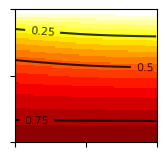

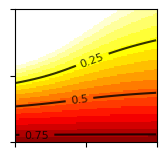

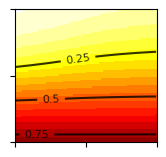

In [ ]:
metrics = ["infections"]
cmaps = [discretize_cmaps("hot_r",21)]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx/1.25,  # Figure width in inches
        'Ly': Ly/1.25,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [0, 0.5,1],
        'xlim': [0, 1],
        'ylim': [0, 1]
    }

fig_R_M = plot_multiple_metrics(
    results_MASKS, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    save_path="./figures/FIG_1/I(pol,mask).pdf"
)

final_params["ylim"] = [0, 1/3]
final_params["yticks"] = [0, 1/6, 1/3]

fig_3 = plot_multiple_metrics(
    results_TESTS,
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    save_path="./figures/FIG_1/I(pol,test).pdf"
)
final_params["ylim"] = [0, MM]
final_params["yticks"] = [0, MM/2, MM]

fig_4 = plot_multiple_metrics(
    results_VACCINATIONS,
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    save_path="./figures/FIG_1/I(pol,vacc).pdf"
)

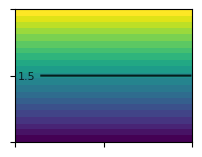

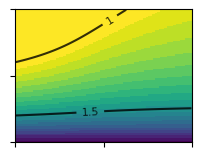

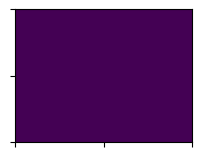

In [ ]:
metrics = ["r0"]
cmaps = [discretize_cmaps("viridis_r",21)]
contour_values = [[1, 1.5]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly/1.25,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [0, 0.5,1],
        'xlim': [0, 1],
        'ylim': [0, 1]
    }

final_params['vmin'] = 1
final_params['vmax'] = 2
fig_R_M = plot_multiple_metrics(
    results_MASKS, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    save_path="./figures/FIG_1/R0(pol,mask).pdf"
)

final_params["ylim"] = [0, 1/3]
final_params["yticks"] = [0, 1/6, 1/3]

fig_3 = plot_multiple_metrics(
    results_TESTS,
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    save_path="./figures/FIG_1/R0(pol,test).pdf"
)
final_params["ylim"] = [0, MM]
final_params["yticks"] = [0, MM/2, MM]

fig_4 = plot_multiple_metrics(
    results_VACCINATIONS,
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    save_path="./figures/FIG_1/R0(pol,vacc).pdf"
)

In [ ]:
from src.utils.batch_sweep import sweep_one_parameter
from src.utils.visualization.heatmaps import plot_compartment_heatmap2

In [ ]:
custom_base_params = {
        'beta_M': 0.2,
        'recovery_rate': 0.1,
        'dT': 1,
        'SPB_exponent': 1,
        # parameters for SIRM
        'mu_min': 0,
        'mu_max': 0.5,
        # parameters for SIRT
        'testing_rate_min': 0,        # Set minimum testing rate to 0
        'testing_rate_max': 1/6,      # Set maximum testing rate to 2/7
        # parameters for SIRV
        'vaccination_rate_min': 0,        # Set minimum VR to 0
        'vaccination_rate_max': 0.0075    # Set maximum VR to 0.015
    }

NP = 100
pol_range = {"m": 0, "M": 1, "n": NP}

results_M = sweep_one_parameter(
    model_module=SIRM,
    param_name="beta_params",  # This is how polarization is referenced in the code
    param_range=pol_range,
    simulated_days=1000,  # Simulate for 1000 days to reach steady state
    custom_base_params=custom_base_params,
    population_size=100  # 100 compartments as you requested
)

results_T = sweep_one_parameter(
    model_module=SIRT,
    param_name="beta_params",  # This is how polarization is referenced in the code
    param_range=pol_range,
    simulated_days=1000,  # Simulate for 1000 days to reach steady state
    custom_base_params=custom_base_params,
    population_size=100  # 100 compartments as you requested
)

results_V = sweep_one_parameter(
    model_module=SIRV,
    param_name="beta_params",  # This is how polarization is referenced in the code
    param_range=pol_range,
    simulated_days=1000,  # Simulate for 1000 days to reach steady state
    custom_base_params=custom_base_params,
    population_size=100  # 100 compartments as you requested
)


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


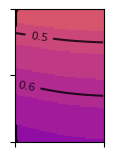

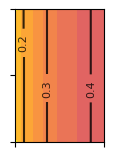

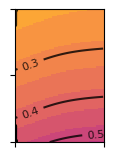

In [ ]:
# Define publication parameters
final_params = {
    'Lx': Lx/2,  # Standard figure width
    'Ly': Ly/1.25,  # Standard figure height
    'xticks': [0, 1.0],  # Custom x-tick positions
    'yticks': [0,  50,  99],  # Custom y-tick positions
    'xlim': [0, 1],  # x-axis limits
    'ylim': [0, 99],  # y-axis limits
    'vmin': 0,  # Minimum color value
    'vmax': 1  # Maximum color value (adjust based on expected infection levels)
}

contour_values = [0.2, 0.3, 0.4, 0.5, 0.6]
contour_colors = ['#000','#000','#000']
# Create publication-ready heatmap
fig = plot_compartment_heatmap2(
    
    results=results_M,
    compartment="R",
    cmap="plasma_r",
    discretize=True,  # Use discrete color levels
    n_colors=21,      # Number of discrete colors
    final_params=final_params,
    contour_values = contour_values,
    contour_colors = contour_colors,
    save_path="figures/Fig_1/I_PC_M.png"  # Optional: save the figure
)

# Create publication-ready heatmap
fig = plot_compartment_heatmap2(
    
    results=results_T,
    compartment="R",
    cmap="plasma_r",
    discretize=True,  # Use discrete color levels
    n_colors=21,      # Number of discrete colors
    final_params=final_params,
    contour_values = contour_values,
    contour_colors = contour_colors,
    save_path="figures/Fig_1/I_PC_T.png"  # Optional: save the figure
)

# Create publication-ready heatmap
fig = plot_compartment_heatmap2(
    
    results=results_V,
    compartment="R",
    cmap="plasma_r",
    discretize=True,  # Use discrete color levels
    n_colors=21,      # Number of discrete colors
    final_params=final_params,
    contour_values = contour_values,
    contour_colors = contour_colors,
    save_path="figures/Fig_1/I_PC_V.png"  # Optional: save the figure
)

plt.show()

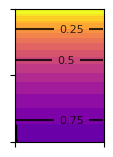

In [ ]:
# First, import the new model
from src.models import SIRM_isolated

# Then use the same parameters as before
custom_base_params = {
    'beta_M': 0.2,
    'recovery_rate': 0.1,
    'dT': 1,
    'SPB_exponent': 1,
    # parameters for SIRM/SIRM_isolated
    'mu_min': 0,
    'mu_max': 0.5,
    # parameters for SIRT
    'testing_rate_min': 0,        # Set minimum testing rate to 0
    'testing_rate_max': 1/6,      # Set maximum testing rate to 2/7
    # parameters for SIRV
    'vaccination_rate_min': 0,        # Set minimum VR to 0
    'vaccination_rate_max': 0.0075    # Set maximum VR to 0.015
}

NP = 100
pol_range = {"m": 0, "M": 1, "n": NP}

# Run the sweep with SIRM_isolated instead of SIRM
results_M_isolated = sweep_one_parameter(
    model_module=SIRM_isolated,
    param_name="beta_params",  # Still using polarization the same way
    param_range=pol_range,
    simulated_days=1000,  # Simulate for 1000 days to reach steady state
    custom_base_params=custom_base_params,
    population_size=100  # 100 compartments as requested
)

# Generate the visualization using the same approach
# Define publication parameters
final_params = {
    'Lx': Lx/2,  # Standard figure width
    'Ly': Ly/1.25,  # Standard figure height
    'xticks': [0, 1.0],  # Custom x-tick positions
    'yticks': [0,  50,  99],  # Custom y-tick positions
    'xlim': [0, 1],  # x-axis limits
    'ylim': [0, 99],  # y-axis limits
    'vmin': 0,  # Minimum color value
    'vmax': 1  # Maximum color value
}

contour_values = [0.25, 0.5, 0.75]
contour_colors = ['#000','#000','#000']

# Create publication-ready heatmap for isolated model
fig_isolated = plot_compartment_heatmap2(
    results=results_M_isolated,
    compartment="R",
    cmap="plasma_r",
    discretize=True,  # Use discrete color levels
    n_colors=21,      # Number of discrete colors
    final_params=final_params,
    contour_values=contour_values,
    contour_colors=contour_colors,
    save_path="figures/Fig_1/I_PC_M_isolated.png"  # Save with a different name
)

In [9]:
cbar_fig = create_standalone_colorbar(
    cmap_name='plasma_r',
    vmin=0,
    vmax=1,
    height=Ly,
    width=Ly/8,
    ticks=[0, 0.5, 1],
    ticklabels=[],
    save_path='figures/Fig_1/plasma_r_colorbar.pdf'
)

cbar_fig = create_standalone_colorbar(
    cmap_name='hot_r',
    vmin=0,
    vmax=1,
    height=Ly,
    width=Ly/8,
    ticks=[0, 0.5, 1],
    ticklabels=[],
    save_path='figures/Fig_1/hot_r_colorbar.pdf'
)

cbar_fig = create_standalone_colorbar(
    cmap_name='viridis_r',
    vmin=0,
    vmax=1,
    height=Ly,
    width=Ly/8,
    ticks=[0, 0.5, 1],
    ticklabels=[],
    save_path='figures/Fig_1/viridis_r_colorbar.pdf'
)
